In [190]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os

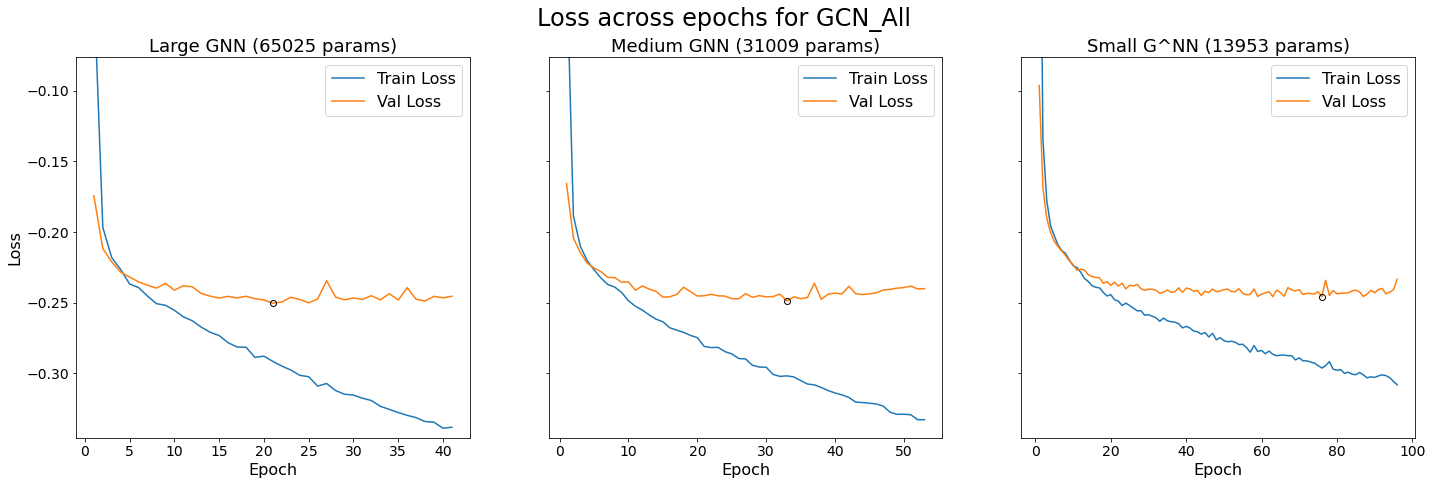

In [189]:
def create_loss_plots(name):
    def create_df(lines):
        data = [[float(x) for x in re.findall('([-]?\d[\d.]*)',l)[1:3]] for l in lines]
        return pd.DataFrame(data, columns = ['Train Loss','Val Loss'], index = range(1, len(lines)+1))

    with open('Results/'+name+'.txt') as f:
        lines = f.readlines() 

    loss_list = [x for x in lines if x.startswith('Epoch')]
    cuts = [i for i, x in enumerate([x.startswith('Epoch  1:') for x in loss_list]) if x] + [len(loss_list)]
    split_loss_list = [loss_list[cuts[i]:cuts[i+1]] for i in range(len(cuts)-1)]
    df_list = [create_df(ll) for ll in split_loss_list]
    Optimums = [(df['Val Loss'].idxmin(),df['Val Loss'].min()) for df in df_list]

    NN_sizes = [int(re.search("\d+", x)[0]) for x in lines if x.startswith(') ')]
    
    # Plot
    names = [f'Large GNN ({NN_sizes[0]} params)', f'Medium GNN ({NN_sizes[1]} params)', f'Small GNN ({NN_sizes[2]} params)']
    fig, axs = plt.subplots(1, len(df_list), sharey = True, figsize=(24,7))
    fig.suptitle('Loss across epochs for ' + name, fontsize = 24)
    for i in range(len(df_list)):
        df_list[i].plot(ax = axs[i])
        axs[i].set_title(names[i], fontsize = 18)
        axs[i].set_xlabel('Epoch', fontsize = 16)
        axs[i].legend(fontsize = 16)
        axs[i].plot(*Optimums[i], 'o', color='k', markerfacecolor='none')
        axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[0].set_ylim((min([df['Train Loss'].min() for df in df_list])*1.02,max([df['Val Loss'].max() for df in df_list])+0.02))
    axs[0].set_ylabel('Loss', fontsize = 16)

    plt.show()

    return df_list


In [203]:
[f for f in os.listdir("Results") if f.startswith('GCN') or f.startswith('GAT') or f.startswith('NN')]

['GCN_Encoded_Zones.txt',
 'GAT_Zones.txt',
 'NN_All_Encoded.txt',
 'GAT_All.txt',
 'GAT_No_Zones.txt',
 'GCN_All.txt',
 'GAT_Weather.txt',
 'NN_Weather.txt',
 'NN_No_Zones.txt',
 'GCN_No_Zones.txt',
 'GCN_All_Encoded.txt',
 'GCN_Weather.txt',
 'NN_Encoded_Zones.txt',
 'GCN_Zones.txt',
 'GAT_Encoded_Zones.txt',
 'GAT_All_Encoded.txt',
 'NN_Zones.txt',
 'NN_All.txt']

[65025, 31009, 13953]